# ML Homework 2022
Valentina Margiotta () 
Sara Resta (225418)

In [1]:
# Run this code to make Jupyter print every
# printable statement and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy
from scipy.stats import t

Importing the datasets

In [35]:
online_shoppers = pd.read_csv("data/online_shoppers_intention.csv")
training_set = pd.read_csv("data/training_set_online_shoppers_intention.csv")
test_set = pd.read_csv("data/test_set_online_shoppers_intention.csv")
online_shoppers.head()
training_set.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,3496,0,0.000000,0,0.0,5,19.000000,0.000000,0.080000,0.000000,0.6,May,2,2,1,3,Returning_Visitor,False,False
1,9415,5,158.700000,0,0.0,51,1364.266667,0.007692,0.011987,0.000000,0.0,Nov,3,2,3,2,Returning_Visitor,True,False
2,9419,7,87.916667,1,0.0,46,1621.025379,0.004082,0.020544,6.023523,0.0,Dec,1,1,3,2,Returning_Visitor,False,False
3,3837,1,4.000000,0,0.0,37,1296.942857,0.013889,NaN,0.000000,0.8,May,2,2,4,2,Returning_Visitor,False,False
4,7305,2,132.400000,0,0.0,11,296.300000,0.000000,NaN,0.000000,0.0,Sep,2,4,3,2,New_Visitor,False,False


Assign "categorical" to type of variables which are considered like that, so that they cannot be considered as "numeric"

In [36]:
online_shoppers['Month']=online_shoppers['Month'].astype('category')
online_shoppers['OperatingSystems']=online_shoppers['OperatingSystems'].astype('category')
online_shoppers['Browser']=online_shoppers['Browser'].astype('category')
online_shoppers['Region']=online_shoppers['Region'].astype('category')
online_shoppers['TrafficType']=online_shoppers['TrafficType'].astype('category')
online_shoppers['VisitorType']=online_shoppers['VisitorType'].astype('category')
online_shoppers['Weekend']=online_shoppers['Weekend'].astype('category')

# 1. Dataset inspection and regression

## 1.1 Dataset inspection

First of all, we do some visual inspection on our data.

In [ ]:
# Month --> categorical
#online_shoppers['Month'].unique() # 10 categories
df = pd.DataFrame({'Month':list(online_shoppers['Month'].value_counts().index), 
                   'counts':list(online_shoppers['Month'].value_counts().values)})
df.plot.bar(x='Month', y='counts', rot=0)

In [ ]:
# OperatingSystems --> categorical
online_shoppers['OperatingSystems'].unique() # 8 categories
online_shoppers['OperatingSystems'].value_counts()
df = pd.DataFrame({'Operating system':list(online_shoppers['OperatingSystems'].value_counts().index), 
                   'counts':list(online_shoppers['OperatingSystems'].value_counts().values)})
df.plot.bar(x='Operating system', y='counts', rot=0)

In [ ]:
# Browser --> categorical
online_shoppers['Browser'].unique() # 13 categories
online_shoppers['Browser'].value_counts()
df = pd.DataFrame({'Browser':list(online_shoppers['Browser'].value_counts().index), 
                   'counts':list(online_shoppers['Browser'].value_counts().values)})
df.plot.bar(x='Browser', y='counts', rot=0)

In [ ]:
# Region --> categorical
online_shoppers['Region'].unique() # 9 categories
online_shoppers['Region'].value_counts()
df = pd.DataFrame({'Region':list(online_shoppers['Region'].value_counts().index), 
                   'counts':list(online_shoppers['Region'].value_counts().values)})
df.plot.bar(x='Region', y='counts', rot=0)

In [ ]:
# TrafficType --> categorical
online_shoppers['TrafficType'].unique() # 20 categories
online_shoppers['TrafficType'].value_counts()
df = pd.DataFrame({'Traffic type':list(online_shoppers['TrafficType'].value_counts().index), 
                   'counts':list(online_shoppers['TrafficType'].value_counts().values)})
df.plot.bar(x='Traffic type', y='counts', rot=0)

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

<AxesSubplot:xlabel='Visitor type'>

<AxesSubplot:ylabel='Visitor type'>

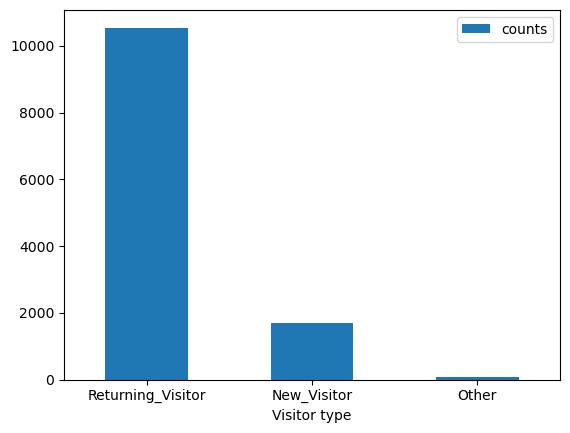

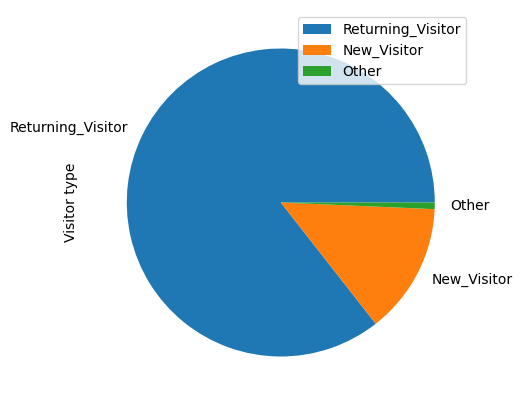

In [13]:
# VisitorType --> categorical
online_shoppers['VisitorType'].unique() # 3 categories
online_shoppers['VisitorType'].value_counts()
df_bar = pd.DataFrame({'Visitor type':list(online_shoppers['VisitorType'].value_counts().index), 
                       'counts':list(online_shoppers['VisitorType'].value_counts().values)})
df_bar.plot.bar(x='Visitor type', y='counts', rot=0)
df_pie = pd.DataFrame({'Visitor type': list(online_shoppers['VisitorType'].value_counts().values)},
                  index=list(online_shoppers['VisitorType'].value_counts().index))
df_pie.plot.pie(y='Visitor type', figsize=(5, 5))

In [ ]:
# Weekend --> categorical
online_shoppers['Weekend'].unique() # 2 categories (binary)
online_shoppers['Weekend'].value_counts()
df_bar = pd.DataFrame({'Weekend':list(online_shoppers['Weekend'].value_counts().index), 
                       'counts':list(online_shoppers['Weekend'].value_counts().values)})
df_bar.plot.bar(x='Weekend', y='counts', rot=0)
df_pie = pd.DataFrame({'Weekend': list(online_shoppers['Weekend'].value_counts().values)},
                  index=list(online_shoppers['Weekend'].value_counts().index))
df_pie.plot.pie(y='Weekend', figsize=(5, 5))

In [ ]:
df = pd.DataFrame({'Administrative':online_shoppers['Administrative'],
                   'Administrative_Duration':online_shoppers['Administrative_Duration'],
                   'Informational':online_shoppers['Informational'],
                   'Informational_Duration':online_shoppers['Informational_Duration'],
                   'ProductRelated':online_shoppers['ProductRelated'], 
                   'ProductRelated_Duration':online_shoppers['ProductRelated_Duration'],
                   'BounceRates':online_shoppers['BounceRates'], 
                   'ExitRates':online_shoppers['ExitRates'],
                   'PageValues':online_shoppers['PageValues'], 
                   'SpecialDay':online_shoppers['SpecialDay']}) 
df.describe()

In [ ]:
df = pd.DataFrame({'Administrative':online_shoppers['Administrative'], 
                   'Informational':online_shoppers['Informational'],
                   'ProductRelated':online_shoppers['ProductRelated']}) 
df.describe()
# Administrative --> continue
sns.boxplot(data=df['Administrative'], orient='v', fliersize = 0)
plt.ylim(-1, 15)
# toglie fliersize nel boxplot per visualizzare gli outliers

In [ ]:
# Informational --> continue
sns.boxplot(data=df['Informational'], orient='v', fliersize = 0)
plt.ylim(-1, 5)

In [ ]:
# ProductRelated --> continue
sns.boxplot(data=df['ProductRelated'], orient='v', fliersize = 0)
plt.ylim(-1, 100)

In [ ]:
sns.boxplot(data=df, orient='v', fliersize = 0)
plt.ylim(-10, 100)

In [ ]:
df = pd.DataFrame({'Administrative_Duration':online_shoppers['Administrative_Duration'], 
                   'Informational_Duration':online_shoppers['Informational_Duration'],
                   'ProductRelated_Duration':online_shoppers['ProductRelated_Duration']}) 
df.describe()
# Administrative_Duration --> continue
sns.boxplot(data=df['Administrative_Duration'], orient='v', fliersize = 0)
plt.ylim(-10, 300)

In [ ]:
# Informational_Duration --> continue
sns.boxplot(data=df['Informational_Duration'], orient='v', fliersize = 0)
plt.ylim(-1, 5)

In [ ]:
# ProductRelated_Duration --> continue
sns.boxplot(data=df['ProductRelated_Duration'], orient='v', fliersize = 0)
plt.ylim(-100, 4000)

In [ ]:
sns.boxplot(data=df, orient='v', fliersize = 0)
plt.ylim(-100, 4000)

In [ ]:
df = pd.DataFrame({'BounceRates':online_shoppers['BounceRates'], 
                   'ExitRates':online_shoppers['ExitRates']}) 
df.describe()
# BounceRates and ExitRates --> continues
sns.boxplot(data=df[['BounceRates', 'ExitRates']], orient='v', fliersize=0)
plt.ylim(-1, 5)

In [ ]:
# PageValues --> continue
online_shoppers['PageValues'].describe()
sns.boxplot(data=online_shoppers['PageValues'], orient='v', fliersize=0)
plt.ylim(-1, 5)

In [ ]:
# SpecialDay --> continue
online_shoppers['SpecialDay'].describe()
sns.boxplot(data=online_shoppers['SpecialDay'], orient='v', fliersize=0)
plt.ylim(-1, 5)

We want to know which are the most correlated variables with the target class and if there is any correlation between the variables.
We start considering if there is a correlation between some variables

We firstly check if there is any correlation printing the heatmap to see if there is any correlation between the dataset features. The most correlated variables are:
* Administrative, Administrative_Duration
* Informational, Informational_Duration
* ProductRelated, ProductRelated_Duration
* BounceRates (% of visitors that leave the website without viewing any other page), ExitRates (% of visitors that leave the website from that page without purchasing)

In [ ]:
sns.heatmap(online_shoppers.corr())

Now we print a scatterplot for the pairs of variables for which we found a correlation

In [ ]:
online_shoppers.plot.scatter('Administrative','Administrative_Duration')
online_shoppers.plot.scatter('Informational','Informational_Duration')
online_shoppers.plot.scatter('ProductRelated','ProductRelated_Duration')
online_shoppers.plot.scatter('BounceRates','ExitRates')

## 1.2 Regression

In [37]:
# VisitorType -> others removed
training_set = training_set[training_set['VisitorType']!='Other']

#VisitorType -> 1 = returning, 0 = new
training_set['VisitorType'] = np.where(training_set['VisitorType']=='Returning_Visitor',1,0)

# Split categorical variables
months = pd.get_dummies(training_set.Month, prefix='Month')
regions = pd.get_dummies(training_set.Region, prefix='Region')


# Looking at the other data to decide if we can set a threshold for the 'other' category
#training_set['Browser'].value_counts()
#training_set['TrafficType'].value_counts()
#training_set['OperatingSystems'].value_counts()

def cut_levels(x, threshold, new_value):
    x = x.copy()
    value_counts = x.value_counts()
    labels = value_counts.index[value_counts < threshold]
    x[np.in1d(x, labels)] = new_value
    return x

training_set['Browser'] = cut_levels(training_set['Browser'],100,'Others')
training_set['TrafficType'] = cut_levels(training_set['TrafficType'],100,'Others')
training_set['OperatingSystems'] = cut_levels(training_set['OperatingSystems'],100,'Others')

browser = pd.get_dummies(training_set.Browser, prefix='Browser')
traffic_type = pd.get_dummies(training_set.TrafficType, prefix='TrafficType')
operating_systems = pd.get_dummies(training_set.OperatingSystems, prefix='OperatingSystems')



# Replacing the old categorical features with the new ones
training_set = training_set.drop(['Unnamed: 0','Month','Region','Browser','TrafficType','OperatingSystems'], axis=1).join([months,regions,browser,traffic_type,operating_systems])

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,3496,0,0.000000,0,0.0,5,19.000000,0.000000,0.080000,0.000000,0.6,May,2,2,1,3,1,False,False
1,9415,5,158.700000,0,0.0,51,1364.266667,0.007692,0.011987,0.000000,0.0,Nov,3,2,3,2,1,True,False
2,9419,7,87.916667,1,0.0,46,1621.025379,0.004082,0.020544,6.023523,0.0,Dec,1,1,3,2,1,False,False
3,3837,1,4.000000,0,0.0,37,1296.942857,0.013889,NaN,0.000000,0.8,May,2,2,4,2,1,False,False
4,7305,2,132.400000,0,0.0,11,296.300000,0.000000,NaN,0.000000,0.0,Sep,2,4,3,2,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9243,7878,10,130.550000,1,23.2,7,128.233333,0.006667,0.015238,0.000000,0.0,Oct,2,2,6,5,0,False,False
9244,6568,14,260.736111,3,186.5,51,2921.902778,0.013661,0.029891,8.339172,0.0,Nov,4,2,7,1,1,True,True
9245,6989,7,109.500000,0,0.0,25,349.696970,0.000000,0.019048,0.000000,0.0,Oct,1,1,1,2,1,False,False
9246,7640,4,82.700000,0,0.0,26,405.283333,0.000000,NaN,0.000000,0.0,Nov,2,2,1,2,0,False,False


In [38]:
# split the training set to separate the rows with missing values
mask = training_set['ExitRates'].isna()
training_set_missing = training_set[mask]
#training_set_missing.head()
training_set_no_missing = training_set[mask==False]
#training_set_no_missing.head()

In [39]:
# Split the features of the dataset
X_all_features = np.delete(training_set.columns.values, [np.where(training_set.columns.values=='ExitRates'),np.where(training_set.columns.values=='Revenue')], axis=None)
#X_all_features
X = training_set_no_missing[X_all_features].to_numpy()
y = training_set_no_missing['ExitRates'].to_numpy()

In [43]:
from sklearn.linear_model import LinearRegression

# Fit the LinearRegression predictor
model = LinearRegression(fit_intercept=True) # 1- hyperparams selection
model = model.fit(X, y)          # 2- model fitting
#y_predict_test = model.predict(X_test)       # 3- prediction
#y_predict_train = model.predict(X_train)


#print("Train R2 score ", r2_score(y_train, y_predict_train))
#print("Train MSE score ", mean_squared_error(y_train, y_predict_train))
betas = np.array([model.intercept_, *model.coef_]).reshape(-1, 1)
betas
show_stats(X, y, betas, ['Intercept', *X_all_features], alpha=0.001)

array([[ 2.20059564e-02],
       [-8.87985784e-04],
       [-2.08592984e-06],
       [ 1.68065348e-06],
       [ 8.80965669e-07],
       [-1.20824570e-04],
       [ 4.02469146e-07],
       [ 8.59090894e-01],
       [-1.33123803e-04],
       [ 6.42121599e-03],
       [ 7.97356750e-03],
       [-5.84988785e-04],
       [-7.80260361e-04],
       [ 5.67017282e-04],
       [-1.88090969e-04],
       [ 7.85191549e-04],
       [ 5.29404120e-03],
       [-8.25840782e-04],
       [-9.34122133e-04],
       [-8.91651045e-05],
       [-1.76133962e-03],
       [-2.06743106e-03],
       [ 5.16613231e-04],
       [-5.64909228e-04],
       [ 8.85793881e-04],
       [ 1.27115927e-04],
       [-1.26306035e-04],
       [-6.14443420e-04],
       [-1.51151493e-03],
       [-7.00925963e-04],
       [ 1.98857654e-03],
       [ 2.72919470e-04],
       [-3.54165679e-04],
       [ 1.36414826e-04],
       [-8.46743326e-04],
       [ 1.39074115e-04],
       [ 1.03950875e-03],
       [-2.48236236e-03],
       [ 2.0

NameError: name 'show_stats' is not defined